# University of Toronto
**Master of Engineering**<br>
**Introduction to Data Science and Analytics**

## Salary Analysis in Data Science and Machine Learning Industry

In [1]:
import pandas as pd
import numpy as np
import random
import sys
from scipy import stats
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import lognorm
try:
    import statsmodels.api as sm
    from statsmodels.graphics.gofplots import qqplot
except:
    !pip install statsmodels
    import statsmodels.api as sm
    from statsmodels.graphics.gofplots import qqplot
try:
    import pingouin as pg
except:
    !pip install pingouin
    import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
try:
    import plotly.express as px
except:
    !pip install plotly
    import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=37287c08c928f1006b27e47650b95aa0e27bcf0760670c9eaab4974b0e01668a
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [2]:
# Increase maximum column displayed
pd.set_option('display.max_columns', 999)
# pd.set_option('display.max_rows', 500)

In [3]:
# Check the version of Python
print(sys.version)

3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]


## Questions
### The objective of this assignment is to explore the survey data to understand:
* **(1)** the nature of **women’s representation** in Data Science and Machine Learning and
* **(2)** the effects of **education** on **income level**. The following tasks should be completed:

## Part 1 Exploratory data analysis

## Import Dataset

In [4]:
# This is the clean dataset
url = "clean_kaggle_data.csv"
df = pd.read_csv(url)

In [5]:
# Brief overview of how the dataset looks like. Selecting 4 rows.
df.head(4)

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_9,Q32_A_Part_10,Q32_A_Part_11,Q32_A_Part_12,Q32_A_Part_13,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_18,Q32_A_Part_19,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_14,Q34_A_Part_15,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_

In [6]:
# 370 Columns, 15391 Rows
df.shape

(15391, 370)

**Select necessary columns for the analysis**

- Age (Years): `Q1`
- Gender: `Q2`
- Country (currently residing): `Q3`
- Highest Education Level: `Q4`
- Professional Experience:
    - Current/Recent Position: `Q5`
    - Type of Industry: `Q20`
    - Experience Coding (Years): `Q6`
    - Programming Languages of Use: `Q7`
- Yearly Compensation (USD): `Q25`

In [7]:
# List of columns to select:
list_col = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q20','Q25']

In [8]:
# This is a function that takes a dataframe and a list of columns as inputs
# The function outputs a dictionary that shows you if a certain column that you wish to select has any other related columns.
# For example, we have a column like "Q7" and "Q7_Part_1". We want to know if there are any of those "Q7_Part_1" type of columns.

def find_related_columns(df, list_col = ['Q1','Q2','Q3','Q4','Q6','Q7','Q20','Q25']):
    temp_dict = {}
    all_possible_columns = df.columns.tolist() # All columns

    for element in list_col:
        if element not in temp_dict:
            temp_dict[element] = [element]

        for column in all_possible_columns:
            if column == element:
                continue
            elif element in column.split('_'):
                temp_dict[element].append(column)

    return temp_dict

In [9]:
%pprint
find_related_columns(df, list_col)

Pretty printing has been turned OFF


{'Q1': ['Q1'], 'Q2': ['Q2'], 'Q3': ['Q3'], 'Q4': ['Q4'], 'Q5': ['Q5'], 'Q6': ['Q6'], 'Q7': ['Q7', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'], 'Q20': ['Q20'], 'Q25': ['Q25']}

In [10]:
%pprint

Pretty printing has been turned ON


#### `Q7` seems to have been separated into multiple columns to make each column of Q7 binary. For the simplicity, I will unselect `Q7` from my column selection list.

In [11]:
df_original = df.copy()
df = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q20', 'Q6', 'Q25']]
df.columns = ['Age','Gender', 'Country', 'Education','Position','Industry','Programming_Experience','Salary']
df.head(5)

,Age,Gender,Country,Education,Position,Industry,Programming_Experience,Salary
0,50-54,Man,India,Bachelor’s degree,Other,Manufacturing/Fabrication,5-10 years,30000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,20+ years,70000
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,Academics/Education,1-3 years,1000
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,Academics/Education,20+ years,40000
4,45-49,Man,India,Doctoral degree,Other,Academics/Education,< 1 years,40000


In [12]:
# Check if any null exist in each column
df.isnull().sum()

Age                       0
Gender                    0
Country                   0
Education                 0
Position                  0
Industry                  0
Programming_Experience    0
Salary                    0
dtype: int64

In [13]:
# Info of the updated df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15391 entries, 0 to 15390
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     15391 non-null  object
 1   Gender                  15391 non-null  object
 2   Country                 15391 non-null  object
 3   Education               15391 non-null  object
 4   Position                15391 non-null  object
 5   Industry                15391 non-null  object
 6   Programming_Experience  15391 non-null  object
 7   Salary                  15391 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 962.1+ KB


In [14]:
df.describe()

,Salary
count,15391.000000
mean,49116.009356
std,98090.207788
min,1000.000000
25%,2000.000000
50%,15000.000000
75%,60000.000000
max,1000000.000000


In [15]:
df.describe(include="O")

,Age,Gender,Country,Education,Position,Industry,Programming_Experience
count,15391,15391,15391,15391,15391,15391,15391
unique,11,5,66,7,13,18,7
top,25-29,Man,India,Master’s degree,Data Scientist,Computers/Technology,1-3 years
freq,3235,12642,3376,6799,3240,3826,3691


In [16]:
# There are 5 categories for "Gender" column.

print("List of unique genders: ", df["Gender"].unique())
gender_ratio = df.groupby("Gender")[["Age"]].count().reset_index()
gender_ratio.columns = ["Gender","Count"]
gender_ratio["Percentage"] = gender_ratio["Count"]/gender_ratio["Count"].sum() * 100
gender_ratio = gender_ratio.sort_values(by="Count", ascending = False).reset_index(drop=True)
display(gender_ratio)
fig = px.pie(gender_ratio, values='Count', names='Gender', title='Gender Counts')
fig.show()

List of unique genders:  ['Man' 'Woman' 'Prefer not to say' 'Nonbinary' 'Prefer to self-describe']


,Gender,Count,Percentage
0,Man,12642,82.138912
1,Woman,2482,16.126308
2,Prefer not to say,196,1.273472
3,Nonbinary,47,0.305373
4,Prefer to self-describe,24,0.155935


In [17]:
# There are 7 categories for "Education" column.

print("List of unique Education Levels: ", df["Education"].unique())
edu_ratio = df.groupby("Education")[["Age"]].count().reset_index()
edu_ratio.columns = ["Education","Count"]
edu_ratio["Percentage"] = edu_ratio["Count"]/edu_ratio["Count"].sum() * 100
edu_ratio = edu_ratio.sort_values(by="Count", ascending = False).reset_index(drop=True)
display(edu_ratio)

fig = px.pie(edu_ratio, values='Count', names='Education', title='Highest Education Level Counts')
fig.show()

List of unique Education Levels:  ['Bachelor’s degree' 'Master’s degree' 'Doctoral degree'
 'I prefer not to answer' 'No formal education past high school'
 'Some college/university study without earning a bachelor’s degree'
 'Professional doctorate']


,Education,Count,Percentage
0,Master’s degree,6799,44.175167
1,Bachelor’s degree,4777,31.037619
2,Doctoral degree,2217,14.404522
3,Some college/university study without earning ...,746,4.846988
4,I prefer not to answer,334,2.170099
5,Professional doctorate,290,1.884218
6,No formal education past high school,228,1.481385


In [18]:
# Let's consider data with only "Man" and "Woman" for the simplicity.

# Genders such as "Nonbinary", "Prefer not to say", and "Prefer to self-describe" are
# combined to be less than 2% of the total data.

In [19]:
df_two_gen = df[(df["Gender"]=="Man")|(df["Gender"]=="Woman")]

In [20]:
age_gby = df_two_gen.groupby(["Age","Gender"]).mean().reset_index()
country_gby = df_two_gen.groupby(["Country","Gender"]).mean().reset_index().sort_values(by="Salary")
edu_gby = df_two_gen.groupby(["Education","Gender"]).mean().reset_index().sort_values(by="Salary")
pos_gby = df_two_gen.groupby(["Position","Gender"]).mean().reset_index().sort_values(by="Salary")
ind_gby = df_two_gen.groupby(["Industry","Gender"]).mean().reset_index().sort_values(by="Salary")
pe_gby = df_two_gen.groupby(["Programming_Experience","Gender"]).mean().reset_index()

In [21]:
fig = px.bar(age_gby, x='Age', y='Salary', color="Gender", title = "Average Salaries vs. Age Groups")
fig.show()

In [22]:
fig = px.bar(edu_gby, x='Education', y='Salary', color="Gender", title = "Average Salaries vs. Education Level")
fig.show()

In [23]:
fig = px.bar(ind_gby, x='Industry', y='Salary', color="Gender", title = "Average Salaries vs. Industry")
fig.show()

In [24]:
fig = px.bar(pe_gby.sort_values(by="Salary"), x='Programming_Experience', y='Salary', color="Gender", title = "Average Salaries vs. Programming Exp.")
fig.show()

In [25]:
# Now, let's see how average salaries differ for different Education levels for different columns.

In [26]:
df_three_edu = df[(df["Education"]=="Bachelor’s degree")|(df["Education"]=="Master’s degree")|(df["Education"]=="Doctoral degree")]
df_three_edu.head()

,Age,Gender,Country,Education,Position,Industry,Programming_Experience,Salary
0,50-54,Man,India,Bachelor’s degree,Other,Manufacturing/Fabrication,5-10 years,30000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,20+ years,70000
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,Academics/Education,1-3 years,1000
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,Academics/Education,20+ years,40000
4,45-49,Man,India,Doctoral degree,Other,Academics/Education,< 1 years,40000


In [27]:
age_gby2 = df_three_edu.groupby(["Age","Education"]).mean().reset_index()
country_gby2 = df_three_edu.groupby(["Country","Education"]).mean().reset_index().sort_values(by="Salary")
gen_gby2 = df_three_edu.groupby(["Gender","Education"]).mean().reset_index().sort_values(by="Salary")
pos_gby2 = df_three_edu.groupby(["Position","Education"]).mean().reset_index().sort_values(by="Salary")
ind_gby2 = df_three_edu.groupby(["Industry","Education"]).mean().reset_index().sort_values(by="Salary")
pe_gby2 = df_three_edu.groupby(["Programming_Experience","Education"]).mean().reset_index()

In [28]:
fig = px.bar(age_gby2.sort_values(by="Salary").sort_values(by="Age"), x='Age', y='Salary', color="Education", title = "Average Salaries vs. Age Groups (Education)")
fig.show()

In [29]:
fig = px.bar(ind_gby2, x='Industry', y='Salary', color="Education", title = "Average Salaries vs. Industry (Education)")
fig.show()

In [30]:
fig = px.bar(pe_gby2.sort_values(by="Salary"), x='Programming_Experience', y='Salary', color="Education", title = "Average Salaries vs. Programming Exp. (Education)")
fig.show()

The average salaries seem to increase as people ages from teenagers to late 50s. Once they reach 60s, the salaries seem to decrease.

People with higher education seems to earn higher salary. For example, Doctoral degree and Professional doctorate earn the most, and Master's degree comes next. People with Bachelor degree earns relatively lower than people with Doctoral and Master's degrees.

Programming experience seems to provide quite a large impact to the average salary as well. The trend observed is that the more experienced you are, the higher compensation you earn.

A general trend observed is no matter what which columns or categories of columns you are observing, men's average salaries are higher than that of women's. In the same manner, Doctoral degree has the highest average earnings, Master's degree has the second highest, and Bachelor's degree has the lowest average salaries.

## Part 2 Estimating the **difference** between average salary (Q25) of **men vs. women** (Q2).

### Compute and report **descriptive statistics** for each group

In [31]:
# Functions to compute 0.25 and 0.75 percentiles.
def percentile25(x):
    return x.quantile(0.25)

def percentile75(x):
    return x.quantile(0.75)

In [32]:
# df_q2a = df[["Gender","Salary"]]
df_q2a = df_two_gen[["Gender","Salary"]]
df_q2a_stats =  df_q2a.groupby("Gender").agg(['count','min',percentile25,'median',percentile75,'max', 'mean', 'std'])
df_q2a_stats.columns = df_q2a_stats.columns.get_level_values(1)
df_q2a_stats = df_q2a_stats.reset_index()
df_q2a_stats.columns = ["gender", "count", "min", "25%", "50%", "75%", "max", "mean", "std"]
df_q2a_stats

,gender,count,min,25%,50%,75%,max,mean,std
0,Man,12642,1000,2000.0,20000.0,60000.0,1000000,51193.600696,99979.274378
1,Woman,2482,1000,1000.0,7500.0,50000.0,1000000,34816.881547,72017.347888


In [33]:
# Distribution of Data: Unbootstrapped

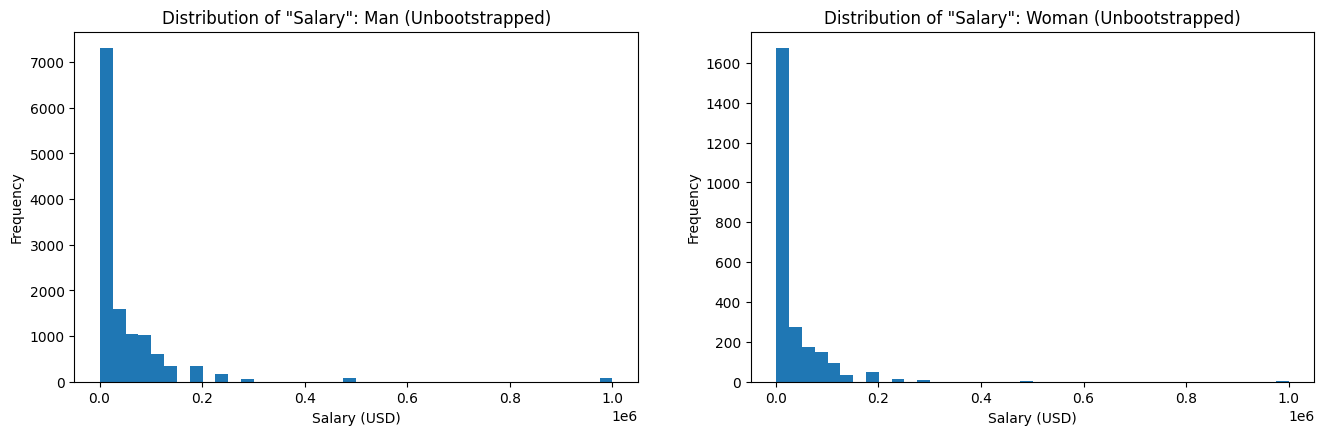

In [34]:
plt.rcParams["figure.figsize"] = [16,10]
plt.subplot(2, 2, 1)
plt.hist(df_q2a[df_q2a["Gender"]=="Man"]["Salary"], 40)
plt.title('Distribution of "Salary": Man (Unbootstrapped)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)
plt.hist(df_q2a[df_q2a["Gender"]=="Woman"]["Salary"], 40)
plt.title('Distribution of "Salary": Woman (Unbootstrapped)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

### Perform a **two-sample t-test** with a 0.05 threshold. (If possible)

#### To perform t-test, there are mainly 2 assumptions:

    1. The distribution should be normal for our data
    2. The variances should be homogeneous.
    
If these two assumptions hold volid, only then the T-test results can actually be relevant or reliable.

In [35]:
df_q2_man = df_q2a[df_q2a["Gender"]=="Man"].reset_index(drop=True)
df_q2_woman = df_q2a[df_q2a["Gender"]=="Woman"].reset_index(drop=True)

#### Check Normal Distribution

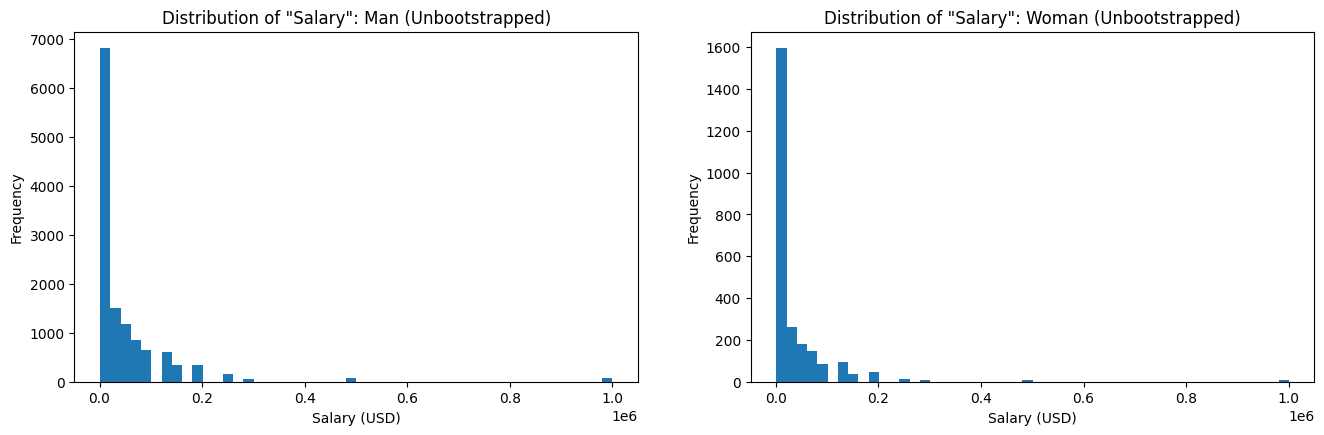

In [36]:
plt.rcParams["figure.figsize"] = [16,10]
plt.subplot(2, 2, 1)
plt.hist(df_q2_man["Salary"], 50)
plt.title('Distribution of "Salary": Man (Unbootstrapped)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)
plt.hist(df_q2_woman["Salary"], 50)
plt.title('Distribution of "Salary": Woman (Unbootstrapped)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

As shown above in the graphs, the distribution of Salary is not normally distributed for both genders. Let's also check on Quantile-Quantile Plot to check the normality.

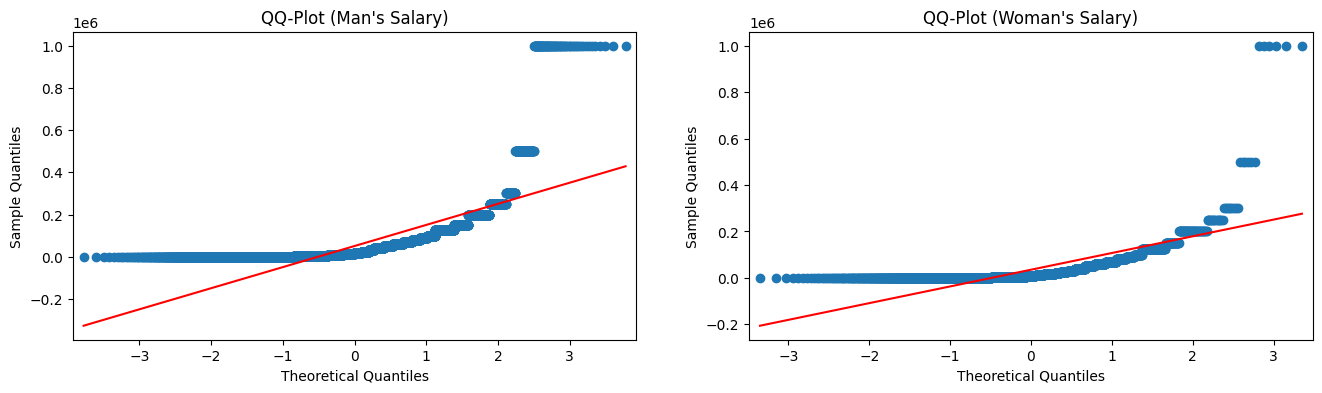

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4))

qqplot(df_q2_man["Salary"].values, line='s', ax=ax1)
qqplot(df_q2_woman["Salary"].values, line='s', ax=ax2)
ax1.set_title('QQ-Plot (Man\'s Salary)')
ax2.set_title('QQ-Plot (Woman\'s Salary)')

plt.show()

It can be seen that the data points generally do not sit on the straight-red line. Therefore, our data cannot be assumed to be normally distributed.

To be more certain, let's perform **Shapiro-Wilk** Test to check the normality. If the p-value of the test is greater than alpha 0f 0.05, we can assume that the data is normally distributed.

In [38]:
# Shapiro Wilk Test:

print("Woman: ", shapiro(df_q2_woman["Salary"].values))
print("Man: ", shapiro(df_q2_man["Salary"].values))

Woman:  ShapiroResult(statistic=0.46219897270202637, pvalue=0.0)
Man:  ShapiroResult(statistic=0.4714226722717285, pvalue=0.0)


Performing Shapiro-Wilk Test, we can observe that p-values for both woman and man are less than alpha of 0.05. Therefore, again we can see that they are not normally distributed.

#### Check Homogeneous Variance

Bartlett's Test: It is a test to determine if all samples have the equal variance. <br>
* **Null Hypothesis**: Every group has equal variance.
* **Alt. Hypothesis**: When compared to other groups, there is a group that has a different variance.


In [39]:
t_stat_bartlett, p_value_bartlett = stats.bartlett(df_q2_man["Salary"].values, df_q2_woman["Salary"].values)
print("t-stat: ", t_stat_bartlett)
print("p-value: ", p_value_bartlett)

t-stat:  384.3138463150983
p-value:  1.431472026620184e-85


Having the significance level (alpha) of 0.05, it can be observed that the p-value obtained from Bartlett's Test is smaller than 0.05. Therefore, we reject the null hypothesis, which suggests that the two groups (Man's Salary and Woman's Salary) have different variance.

In [40]:
# Printing variances of each group:
print("Man:", np.var(df_q2_man["Salary"].values), " ,   Woman:", np.var(df_q2_woman["Salary"].values))

Man: 9995064618.912857  ,   Woman: 5184408752.080249


Therefore, performing a two-sample t-test should be done using the bootstrapping method which uses the idea of the central limit theorem (CLT). The theorem states that the distribtuion of sample means approximates normal distribution. To be more specific, if we generate multiple averages of that sample, the distribution of that average will be a normal distribution or will approximate a normal distribution. The larger the sample sizes, the closer the distribution is to normality. <br> Now, let's bootstrap the data to achieve normal distributions.

### **Bootstrap** the data for comparing the **mean of salary** (Q25) for the two groups.

In [41]:
# Define a function for a central limit theorem: (Referenced from my group's previous code for the in-class presentation)

# n = sample size
# iteration = iteration #
# data = input dataset
def clt(n, iteration, data):
    sample_list = []
    sample_mean_list = []
    for i in range(iteration):
        sample = np.random.choice(data, n)
        sample_list.append(sample)
        sample_mean_list.append(np.mean(sample))
    predicted_mean = np.mean(sample_mean_list)
    return (sample_mean_list, predicted_mean)

#### Finding the suitable value of n (sample size) for each group.

In [42]:
# cnt = Counts of sampling
# h = step size of the increase of the sample size (n)
# data = dataset
# clt_iter = iteration in the clt function
def find_sample_size(cnt, h, data, clt_iter):

    for x in range(1,cnt):
        plt.rcParams["figure.figsize"] = [12,8]
        # samples for distribution and get variance
        [sample_mean,means]=clt(h*x, clt_iter, data)
        sample_mean=pd.DataFrame(data=sample_mean,columns=['Sample_Means'])

        if shapiro(sample_mean.values)[1] > 0.05:
            return (h*x,shapiro(sample_mean.values)[1])
    return "Try adjusting input values. Either increase cnt or h."

# This function returns the interval of the accepted sample size, and also the average of accepted sample size.
# num_iter = number of iterations to run find_sample_size function.
def sample_size_interval_and_avg(num_iter, cnt, h, data, clt_iter):
    temp_list = []
    interval = []
    for i in range(num_iter):
        temp_list.append(find_sample_size(cnt, h, data, clt_iter)[0])
    interval.append(min(temp_list))
    interval.append(max(temp_list))
    try:
        avg = sum(temp_list)/len(temp_list)
    except:
        return "Try adjusting input values. Either increase cnt or h."
    return(interval, avg)

In [43]:
sample_size_man = sample_size_interval_and_avg(20, 30, 50, df_q2_man["Salary"], 1000)
sample_size_woman = sample_size_interval_and_avg(20, 40, 50, df_q2_woman["Salary"], 1000)

In [44]:
print(sample_size_man)
print(sample_size_woman)

([350, 1050], 675.0)
([600, 1150], 877.5)


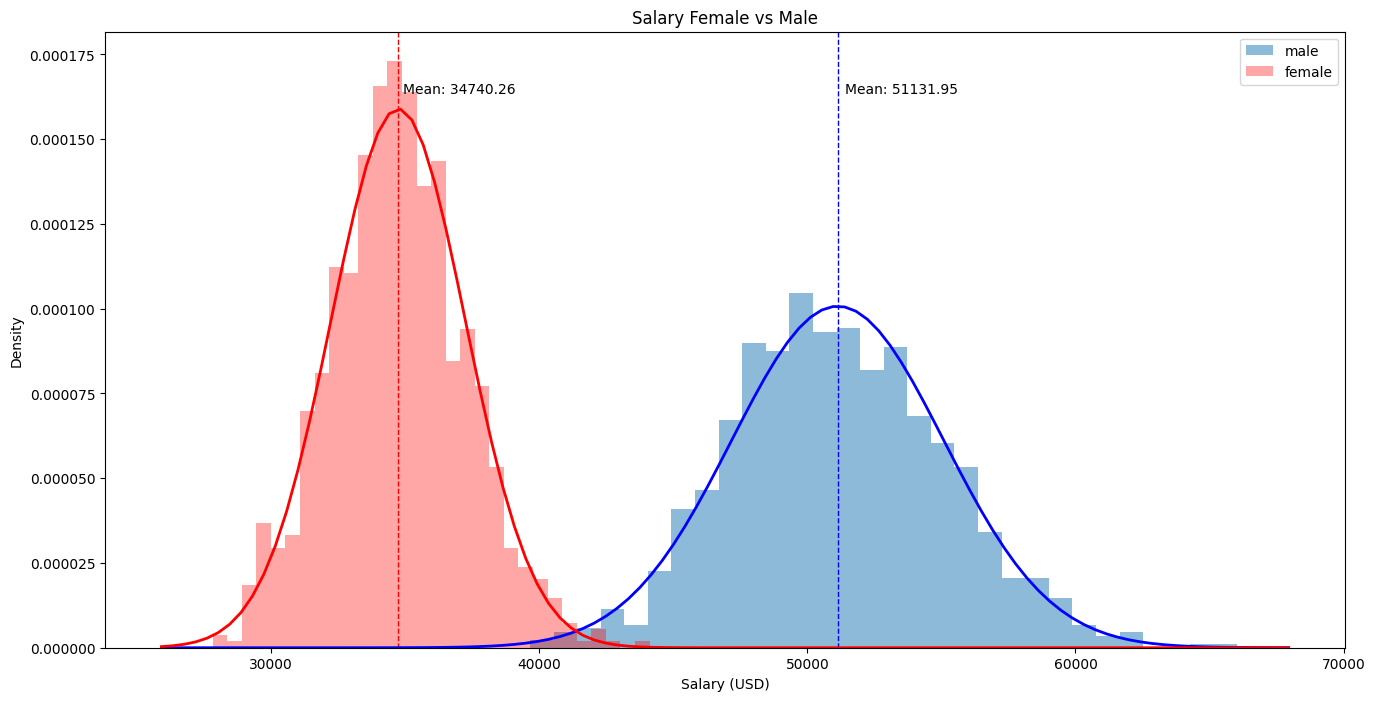

In [45]:
# [sample_mean_female,female_mean]=clt(round(sample_size_woman[1]/10)*10, 1000, df_q2_woman["Salary"])
# [sample_mean_male,male_mean]=clt(round(sample_size_man[1]/10)*10, 1000, df_q2_man["Salary"])

[sample_mean_female, female_mean] = clt(round(sample_size_woman[1]/10)*10, 1000, df_q2_woman["Salary"])
if shapiro(sample_mean_female)[1] < 0.05:
    while shapiro(sample_mean_female)[1] < 0.05:
        if shapiro(sample_mean_female)[1] >= 0.05:
            break
        elif shapiro(sample_mean_female)[1] < 0.05:
            [sample_mean_female, female_mean] = clt(round(sample_size_woman[1]/10)*10, 1000, df_q2_woman["Salary"])

[sample_mean_male, male_mean] = clt(round(sample_size_man[1]/10)*10, 1000, df_q2_man["Salary"])
if shapiro(sample_mean_male)[1] < 0.05:
    [sample_mean_male, male_mean] = clt(round(sample_size_man[1]/10)*10, 1000, df_q2_man["Salary"])
    while shapiro(sample_mean_male)[1] < 0.05:
        if shapiro(sample_mean_male)[1] >= 0.05:
            break
        elif shapiro(sample_mean_male)[1] < 0.05:
            [sample_mean_male, male_mean] = clt(round(sample_size_man[1]/10)*10, 1000, df_q2_man["Salary"])

plt.rcParams["figure.figsize"] = (16,8)
# Plot histogram based on the distribution of sample means
plt.hist(sample_mean_male,30,alpha=0.5,label='male',histtype='stepfilled',density=True)
plt.hist(sample_mean_female,30,alpha=0.35,label='female',histtype='stepfilled',color='red',density=True)

# Draw predicted population mean line
plt.axvline(female_mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(male_mean, color='b', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(male_mean*1.005, max_ylim*0.9, 'Mean: {:.2f}'.format(male_mean))
plt.text(female_mean*1.005, max_ylim*0.9, 'Mean: {:.2f}'.format(female_mean))

# Fit and Plot normal distribution curve over the histogram as a reference
mu_female, std_female = norm.fit(sample_mean_female)
mu_male, std_male = norm.fit(sample_mean_male)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p_m = norm.pdf(x, mu_male, std_male)
plt.plot(x, p_m, 'b', linewidth=2)
p_f = norm.pdf(x, mu_female, std_female)
plt.plot(x, p_f, 'r', linewidth=2)

plt.legend()
plt.title("Salary Female vs Male")
plt.xlabel("Salary (USD)")
plt.ylabel("Density")
plt.show()

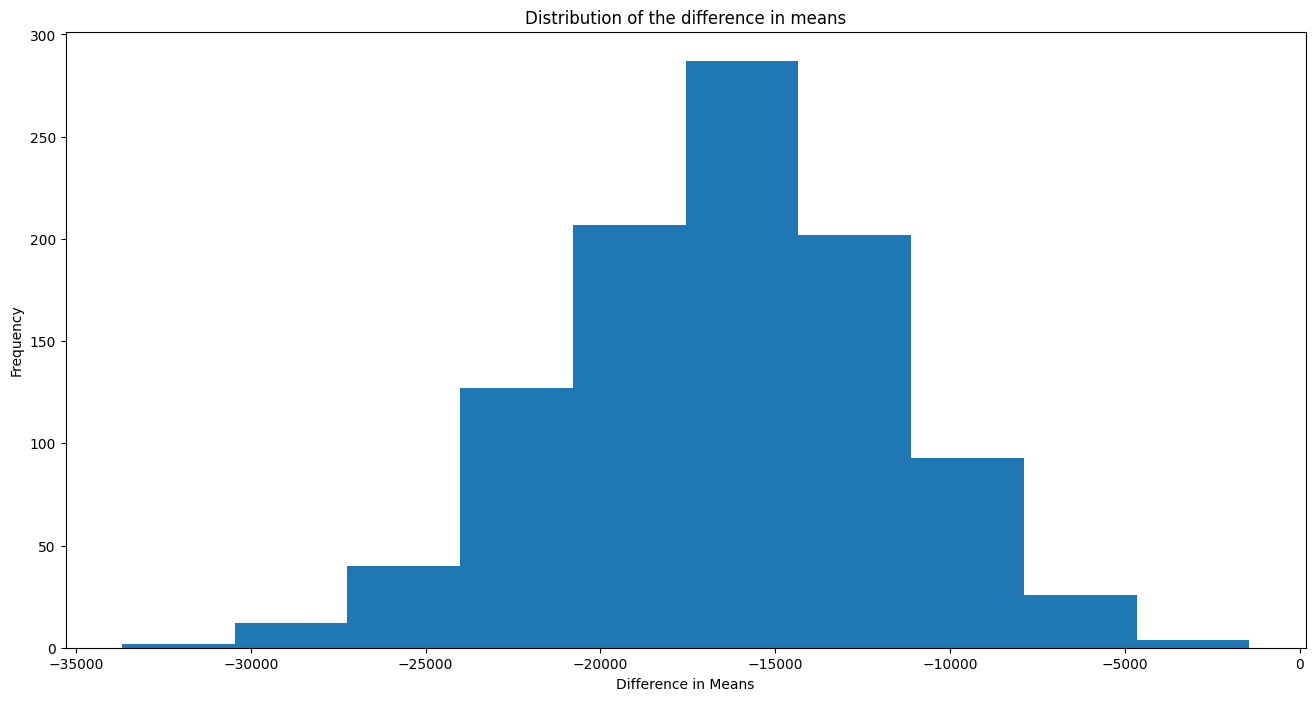

In [46]:
# Plot the distribution of the difference in means
difference_in_means = []

for i in range(1000):
    difference = sample_mean_female[i] - sample_mean_male[i]
    difference_in_means.append(difference)

plt.hist(difference_in_means,bins=10)
plt.title('Distribution of the difference in means')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

### Perform a **two-sample t-test** with a 0.05 threshold on the **bootstrapped data**


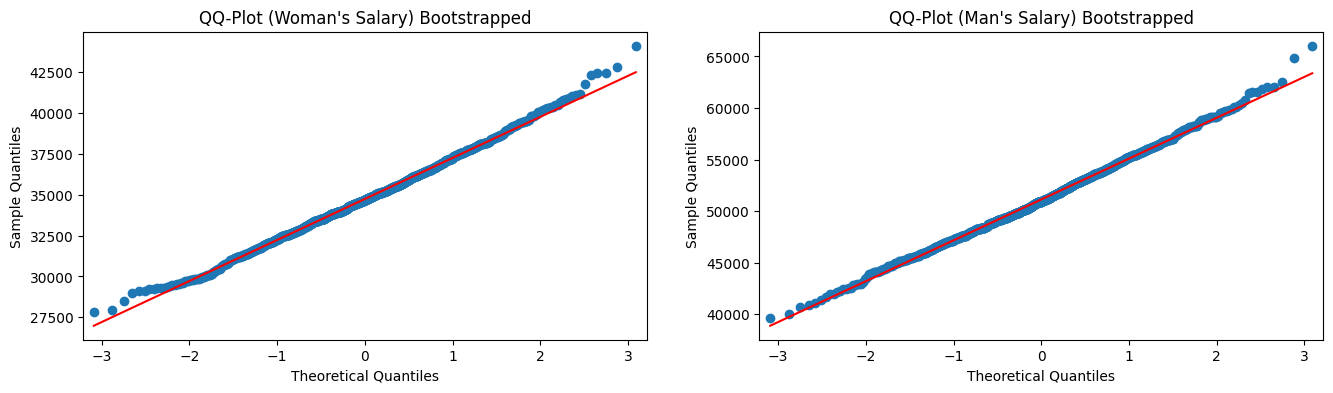

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4))

qqplot(np.array(sample_mean_female), line='s', ax=ax1)
qqplot(np.array(sample_mean_male), line='s', ax=ax2)
ax1.set_title('QQ-Plot (Woman\'s Salary) Bootstrapped')
ax2.set_title('QQ-Plot (Man\'s Salary) Bootstrapped')

plt.show()

Seeing QQ-plots for bootstrapped data, normality seems to have been achieved. Let's double check using **Shapiro-Wilk Test**.

In [48]:
# Shapiro Wilk Test:

print("Woman: ", shapiro(sample_mean_female))
print("Man: ", shapiro(sample_mean_male))

Woman:  ShapiroResult(statistic=0.9970165491104126, pvalue=0.05874141678214073)
Man:  ShapiroResult(statistic=0.9975123405456543, pvalue=0.13234995305538177)


P-values are greater than 0.05 threshold for both genders. Therefore, normality assumption is valid for bootstrapped data.

In [49]:
# Printing variances of each group:
print("Man:", np.var(sample_mean_male), " ,   Woman:", np.var(sample_mean_female))

Man: 15680804.300470913  ,   Woman: 6298651.226787191


Variances for two groups are different as shown above. To double check, let's run **Bartlett's Test** to see if the equal variance assumption holds.

In [50]:
stats.bartlett(sample_mean_male, sample_mean_female)

BartlettResult(statistic=200.847492450161, pvalue=1.3642437832775807e-45)

The p-value is smaller than the significance level of 0.05. Therefore, we can reject the null hypothesis. This suggests that the bootstrapped data for the two groups have different variances.
Use **Welch's T-test** when the equal variance assumption is violated.

In [51]:
# Welch's T test

t_q2, p_q2 = stats.ttest_ind(sample_mean_male, sample_mean_female, equal_var = False)

print("Woman vs. Man Salary t-test:   t = %g  p = %g" % (t_q2, p_q2))

# tc, pc = stats.ttest_ind(sample_mean_female, sample_mean_male)
# print ("Salary t-test: t = %g  p = %g" % (tc, pc))

Woman vs. Man Salary t-test:   t = 110.509  p = 0


### Comment on findings

The p-value is less than 0.05 significance level. Hence we reject the null hypothesis. The means of salaries of two groups (male & female) are statistically different.

## Now, repeat the above steps, but for the three education groups. Use analysis of variance **(ANOVA)** instead of t-test for hypothesis testing.



### Compute and report **descriptive statistics** for each group

In [52]:
# Filter the dataframe.
df_q3 = df[["Education", "Salary"]]
df_q3 = df_q3[(df_q3["Education"]=='Bachelor’s degree')|(df_q3["Education"]=='Master’s degree')|(df_q3["Education"]=="Doctoral degree")]
df_q3 = df_q3.reset_index(drop=True)

In [53]:
df_q3.head()

,Education,Salary
0,Bachelor’s degree,30000
1,Master’s degree,70000
2,Master’s degree,1000
3,Doctoral degree,40000
4,Doctoral degree,40000


In [54]:
df_q3a_stats =  df_q3.groupby("Education").agg(['count','min',percentile25,'median',percentile75,'max', 'mean', 'std'])
df_q3a_stats.columns = df_q3a_stats.columns.get_level_values(1)
df_q3a_stats = df_q3a_stats.reset_index()
df_q3a_stats.columns = ["Education", "count", "min", "25%", "50%", "75%", "max", "mean", "std"]
df_q3a_stats.sort_values(by="mean")

,Education,count,min,25%,50%,75%,max,mean,std
0,Bachelor’s degree,4777,1000,1000.0,7500.0,40000.0,1000000,35578.291815,89382.060777
2,Master’s degree,6799,1000,3000.0,25000.0,70000.0,1000000,52706.868657,90928.786678
1,Doctoral degree,2217,1000,4000.0,40000.0,90000.0,1000000,70641.181777,117160.947589


In [55]:
pie_chart_q3 = df_q3.groupby("Education")[["Salary"]].count().reset_index()
pie_chart_q3.columns = ["Education", "Counts"]
fig = px.pie(pie_chart_q3, values='Counts', names='Education', title='Education Counts')
fig.show()

### Perform a **analysis of variance (ANOVA)** with a 0.05 threshold.

#### To perform ANOVA, there are mainly 2 assumptions:

    1. The distribution should be normal for our data
    2. The variances should be homogeneous.
    
If these two assumptions hold valid, only then the ANOVA results can actually be relevant or reliable.

If the equal variance assumption does not hold, we can conduct Welch's ANOVA.

#### Check Normal Distribution:

In [56]:
df_bach = df_q3[df_q3["Education"] == "Bachelor’s degree"].reset_index(drop=True)
df_master = df_q3[df_q3["Education"] == "Master’s degree"].reset_index(drop=True)
df_doc = df_q3[df_q3["Education"] == "Doctoral degree"].reset_index(drop=True)

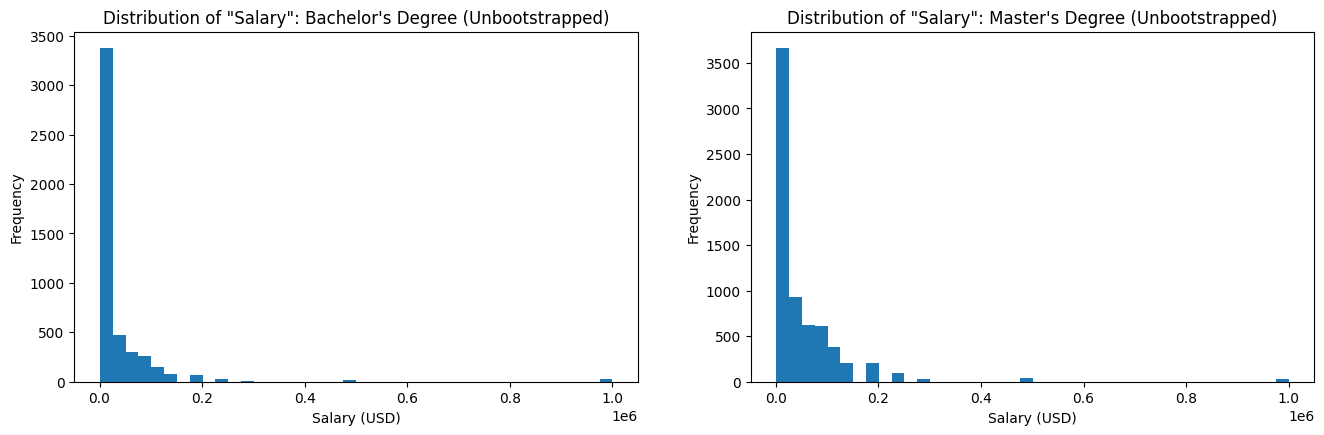

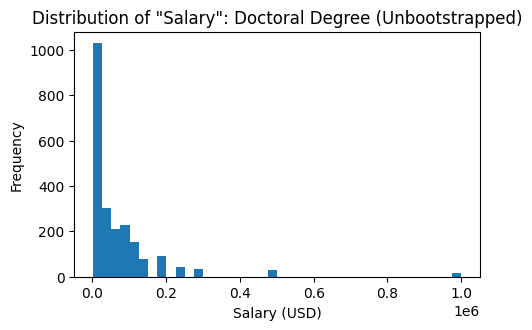

In [57]:
plt.rcParams["figure.figsize"] = [16,10]
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


plt.subplot(2, 2, 1)
plt.hist(df_bach["Salary"], 40)
plt.title('Distribution of "Salary": Bachelor\'s Degree (Unbootstrapped)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df_master["Salary"], 40)
plt.title('Distribution of "Salary": Master\'s Degree (Unbootstrapped)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

plt.rcParams["figure.figsize"] = [11.5,7]
plt.subplot(2, 2, 1)
plt.hist(df_doc["Salary"], 40)
plt.title('Distribution of "Salary": Doctoral Degree (Unbootstrapped)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

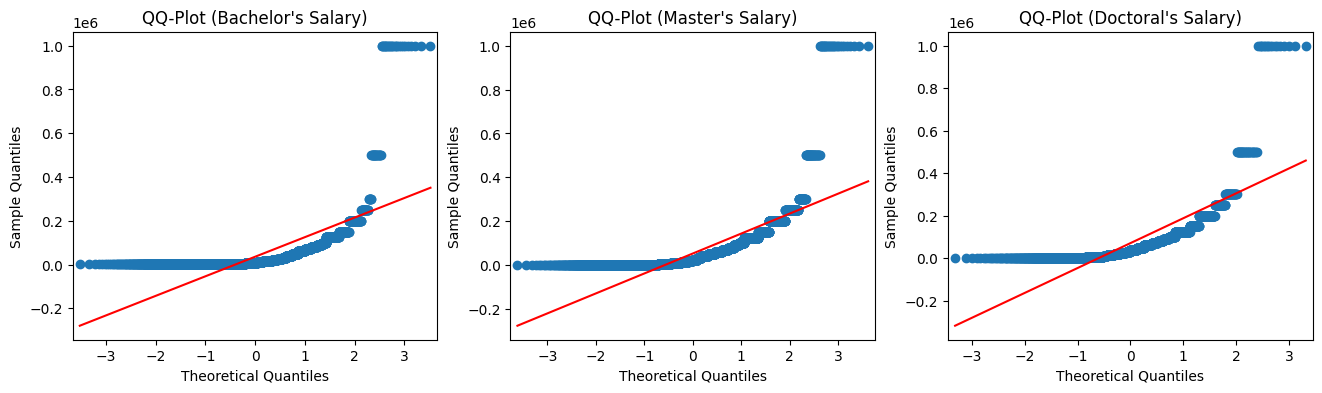

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,4))

qqplot(df_bach["Salary"].values, line='s', ax=ax1)
qqplot(df_master["Salary"].values, line='s', ax=ax2)
qqplot(df_doc["Salary"].values, line='s', ax=ax3)
ax1.set_title('QQ-Plot (Bachelor\'s Salary)')
ax2.set_title('QQ-Plot (Master\'s Salary)')
ax3.set_title('QQ-Plot (Doctoral\'s Salary)')

plt.show()

As shown above in both distribution plots and QQ-plots, it can be observed that the data are not normally distributed. Let's perform Shapiro-Wilk Test to double check the normality.

In [59]:
# Shapiro Wilk Test:

print("Bachelor: ", shapiro(df_bach["Salary"].values))
print("Master: ", shapiro(df_master["Salary"].values))
print("Doctoral: ", shapiro(df_doc["Salary"].values))

Bachelor:  ShapiroResult(statistic=0.36212533712387085, pvalue=0.0)
Master:  ShapiroResult(statistic=0.5266775488853455, pvalue=0.0)
Doctoral:  ShapiroResult(statistic=0.5536705851554871, pvalue=0.0)


Having p-values for all 3 groups to be smaller than the significance level of 0.05, we can check that they are not normally distributed.

#### Check Homogeneous Variance

Bartlett's Test: It is a test to determine if all samples have the equal variance. <br>
* **Null Hypothesis**: Every group has equal variance.
* **Alt. Hypothesis**: When compared to other groups, there is a group that has a different variance.

In [60]:
t_stat_bartlett_q3b, p_value_bartlett_q3b = stats.bartlett(df_bach["Salary"].values, df_master["Salary"].values,
                                                  df_doc["Salary"].values)
print("t-stat: ", t_stat_bartlett_q3b)
print("p-value: ", p_value_bartlett_q3b)

t-stat:  284.5375281698601
p-value:  1.6347856268898147e-62


Having the significance level (alpha) of 0.05, it can be observed that the p-value obtained from Bartlett's Test is smaller than 0.05. Therefore, we reject the null hypothesis, which suggests that three groups (Bachelor's Salary, Master's Salary, Doctoral's Salary) have different variances.

In [61]:
# Printing variances of each group:
print("Bachelor:", np.var(df_bach["Salary"].values), " ,   Master:", np.var(df_master["Salary"].values),
      " ,   Master:", np.var(df_doc["Salary"].values))

Bachelor: 7987480368.193681  ,   Master: 8266828179.031287  ,   Master: 13720496080.335476


### **Bootstrap** data for comparing the **mean of salary** (Q25) for the three groups.

Use **1000** replications.

In [62]:
# Find acceptable sample sizes

In [63]:
sample_size_bach = sample_size_interval_and_avg(20, 30, 80, df_bach["Salary"], 1000)
sample_size_master = sample_size_interval_and_avg(20, 30, 50, df_master["Salary"], 1000)
sample_size_doc = sample_size_interval_and_avg(20, 30, 50, df_doc["Salary"], 1000)

In [64]:
print(sample_size_bach)
print(sample_size_master)
print(sample_size_doc)

([560, 1840], 1108.0)
([300, 1300], 712.5)
([200, 800], 437.5)


Plot **three bootstrapped distributions (for Bachelor, Master, and Doctoral's Degrees)** and the distribution of the **difference in means**.

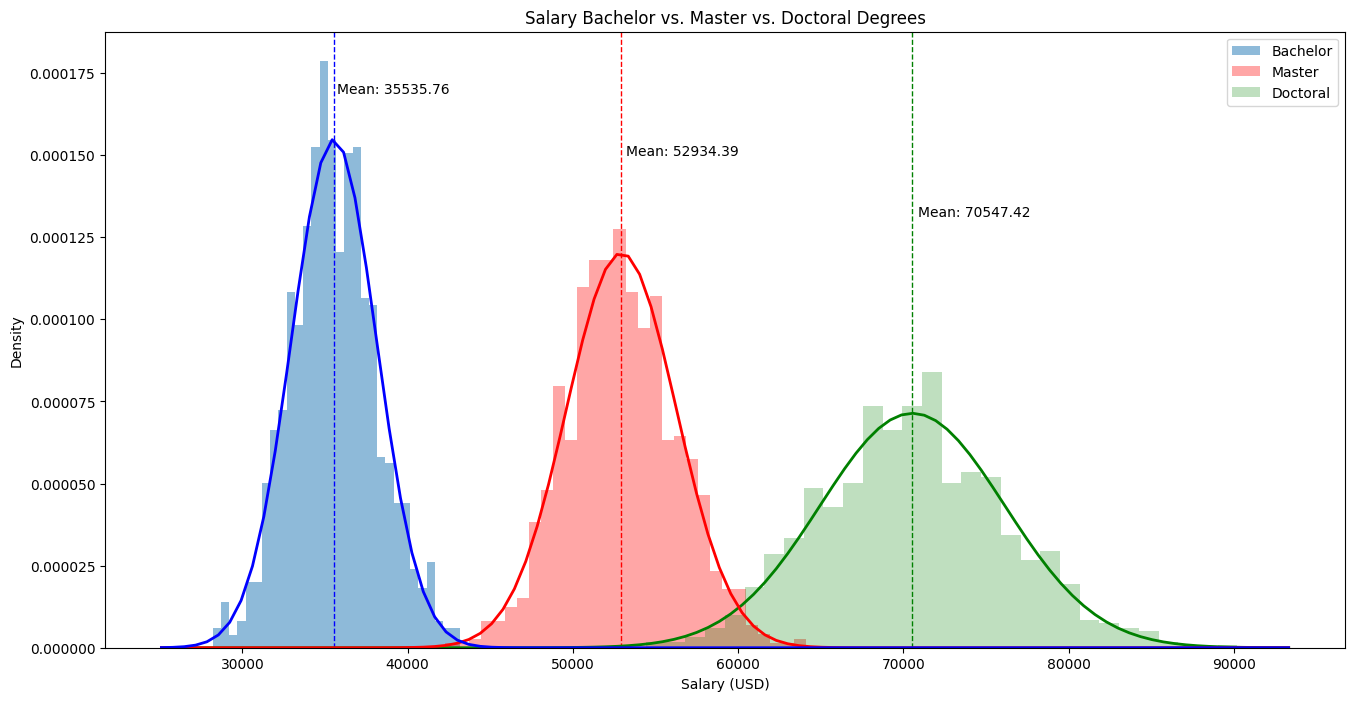

In [65]:
# # Call CLT function and generate distibutions:

[sample_mean_bach, bach_mean] = clt(round(sample_size_bach[1]/10)*10, 1000, df_bach["Salary"])
if shapiro(sample_mean_bach)[1] < 0.05:
    while shapiro(sample_mean_bach)[1] < 0.05:
        if shapiro(sample_mean_bach)[1] >= 0.05:
            break
        elif shapiro(sample_mean_bach)[1] < 0.05:
            [sample_mean_bach, bach_mean] = clt(round(sample_size_bach[1]/10)*10, 1000, df_bach["Salary"])

[sample_mean_master, master_mean] = clt(round(sample_size_master[1]/10)*10, 1000, df_master["Salary"])
if shapiro(sample_mean_master)[1] < 0.05:
    while shapiro(sample_mean_master)[1] < 0.05:
        if shapiro(sample_mean_master)[1] >= 0.05:
            break
        elif shapiro(sample_mean_master)[1] < 0.05:
            [sample_mean_master, master_mean] = clt(round(sample_size_master[1]/10)*10, 1000, df_master["Salary"])

[sample_mean_doc, doc_mean] = clt(round(sample_size_doc[1]/10)*10, 1000, df_doc["Salary"])
if shapiro(sample_mean_doc)[1] < 0.05:
    while shapiro(sample_mean_doc)[1] < 0.05:
        if shapiro(sample_mean_doc)[1] >= 0.05:
            break
        elif shapiro(sample_mean_doc)[1] < 0.05:
            [sample_mean_doc, doc_mean] = clt(round(sample_size_doc[1]/10)*10, 1000, df_doc["Salary"])

plt.rcParams["figure.figsize"] = (16,8)
# Plot histogram based on the distribution of sample means
plt.hist(sample_mean_bach,30,alpha=0.5,label='Bachelor',histtype='stepfilled',density=True)
plt.hist(sample_mean_master,30,alpha=0.35,label='Master',histtype='stepfilled',color='red',density=True)
plt.hist(sample_mean_doc,30,alpha=0.25,label='Doctoral',histtype='stepfilled',color='green',density=True)

# Plot predicted population mean line:
plt.axvline(bach_mean, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(master_mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(doc_mean, color='green', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(bach_mean*1.005, max_ylim*0.9, 'Mean: {:.2f}'.format(bach_mean))
plt.text(master_mean*1.005, max_ylim*0.8, 'Mean: {:.2f}'.format(master_mean))
plt.text(doc_mean*1.005, max_ylim*0.7, 'Mean: {:.2f}'.format(doc_mean))

# Fit and Plot normal distribution curve over the histogram as a reference
mu_bach, std_bach = norm.fit(sample_mean_bach)
mu_master, std_master = norm.fit(sample_mean_master)
mu_doc, std_doc = norm.fit(sample_mean_doc)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p_doc = norm.pdf(x, mu_doc, std_doc)
plt.plot(x, p_doc, 'green', linewidth=2)
p_mas = norm.pdf(x, mu_master, std_master)
plt.plot(x, p_mas, 'r', linewidth=2)
p_bach = norm.pdf(x, mu_bach, std_bach)
plt.plot(x, p_bach, 'b', linewidth=2)

plt.legend()
plt.title("Salary Bachelor vs. Master vs. Doctoral Degrees")
plt.xlabel("Salary (USD)")
plt.ylabel("Density")
plt.show()

Now, plotting the distribution of the difference in means:

In [66]:
# Plot the distribution of the difference in means

def plot_diff_in_mean(data1, data2, n, d1_name, d2_name):
    difference_in_means = []
    for i in range(n):
        difference = data2[i] - data1[i]
        difference_in_means.append(difference)

    plt.hist(difference_in_means,bins=10)
    plt.title('Distribution of the difference in means, '
             + d1_name + " vs. " + d2_name)
    plt.xlabel('Difference in Means')
    plt.ylabel('Frequency')
    plt.show()

#### Distribution of the difference in means: Master vs. Doctoral

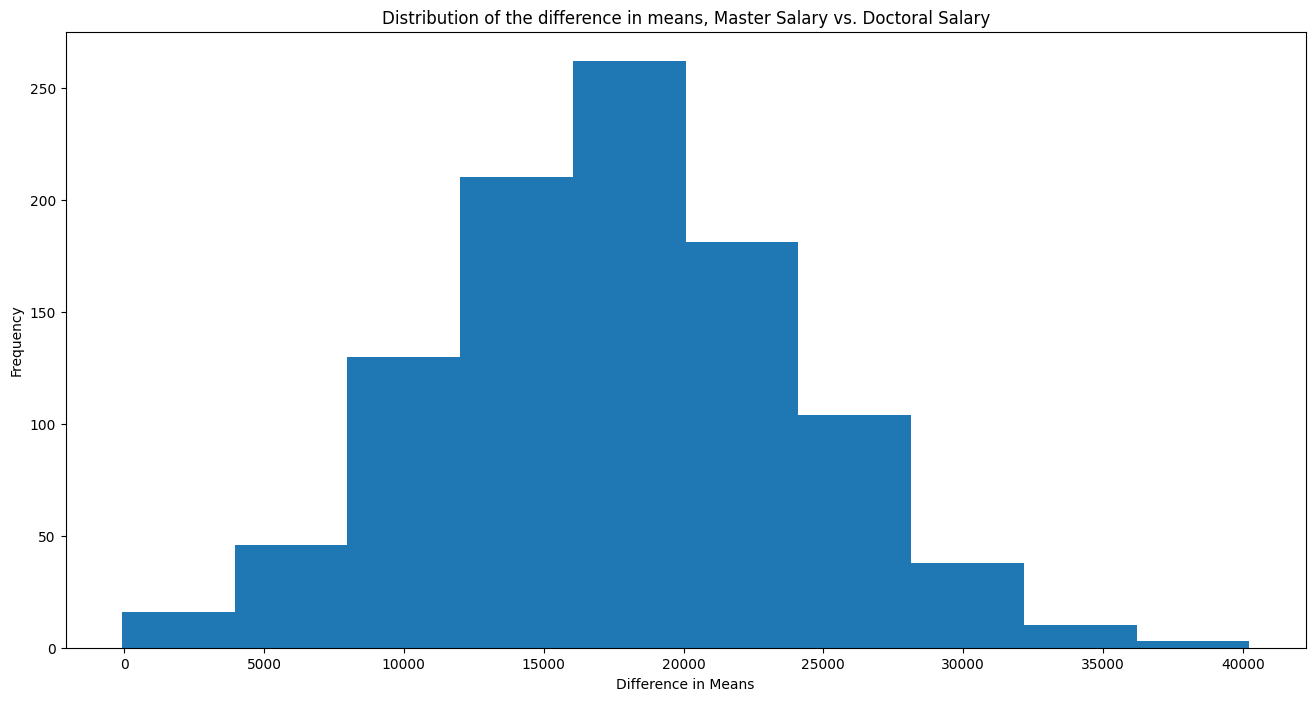

In [67]:
plot_diff_in_mean(sample_mean_master, sample_mean_doc, 1000, "Master Salary", "Doctoral Salary")

#### Distribution of the difference in means: Bachelor vs. Doctoral

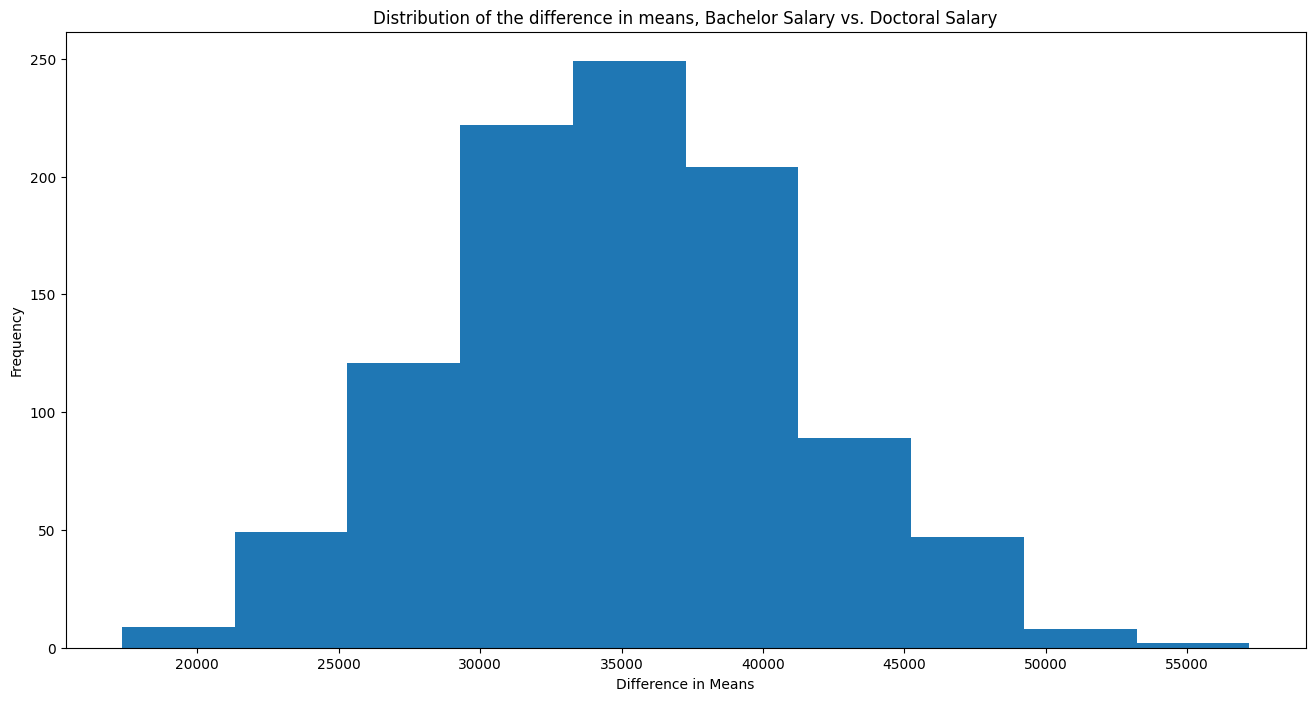

In [68]:
plot_diff_in_mean(sample_mean_bach, sample_mean_doc, 1000, "Bachelor Salary", "Doctoral Salary")


#### Distribution of the difference in means: Bachelor vs. Master

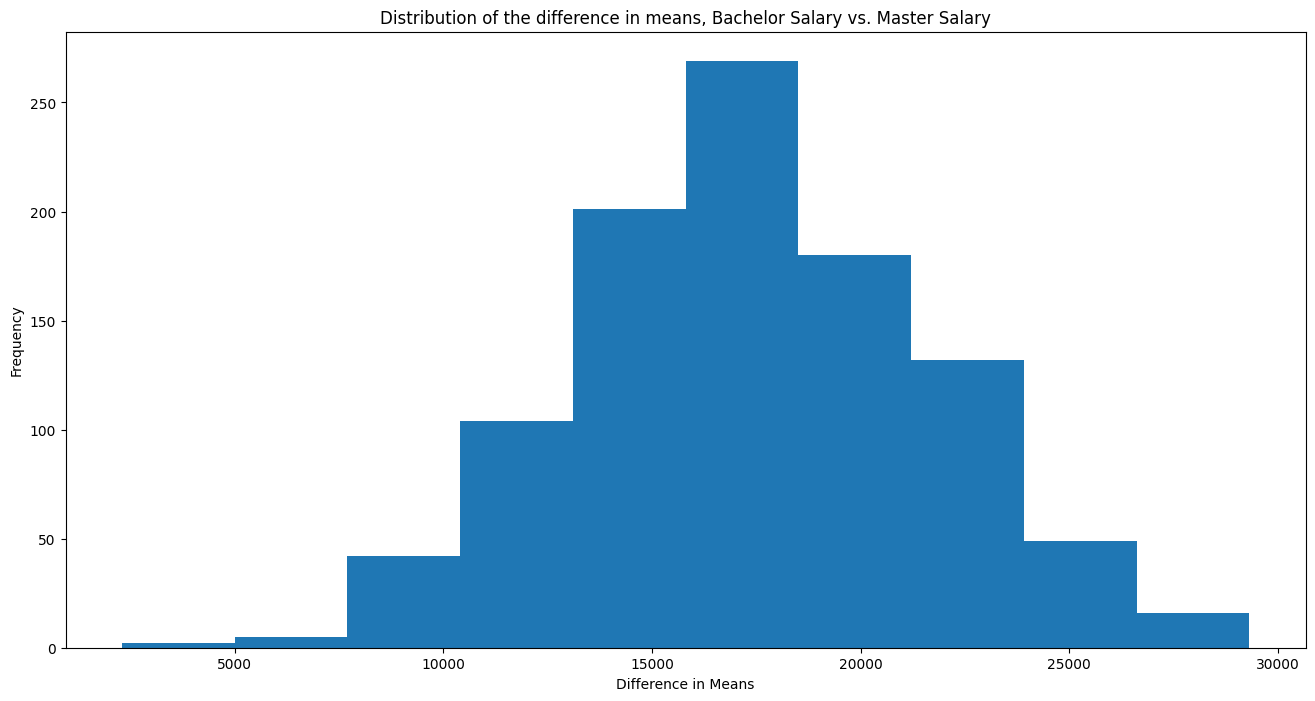

In [69]:
plot_diff_in_mean(sample_mean_bach, sample_mean_master, 1000, "Bachelor Salary", "Master Salary")

### Perform a **ANOVA** with a 0.05 threshold on the **bootstrapped data** if possible.

Perform Shaprio-Wilk Test to check the normality assumption for the bootstrapped data:

In [70]:
print("Bachelor: ", shapiro(sample_mean_bach))
print("Master: ", shapiro(sample_mean_master))
print("Doctoral: ", shapiro(sample_mean_doc))

Bachelor:  ShapiroResult(statistic=0.9973956346511841, pvalue=0.10955300182104111)
Master:  ShapiroResult(statistic=0.9984370470046997, pvalue=0.5141984820365906)
Doctoral:  ShapiroResult(statistic=0.9977886080741882, pvalue=0.20501254498958588)


Normality can be assumed according to the Shapiro-Wilk Test as p-values are greater than 0.05 thresholds.

Now let's run Bartlett's test check equal variance:

In [71]:
stats.bartlett(sample_mean_bach, sample_mean_master, sample_mean_doc)

BartlettResult(statistic=637.7929246335765, pvalue=3.199087488781418e-139)

The p-value is smaller than the significance level of 0.05. Therefore, we can reject the null hypothesis. This suggests that the bootstrapped data for the three group have different variances. <br>

Therefore, use **Welch's ANOVA** as the equal variance assumption is violated.

In [72]:
concat_list = sample_mean_bach + sample_mean_master
concat_list = concat_list + sample_mean_doc
wanova_df = pd.DataFrame({'score': concat_list,
                   'group': np.repeat(['Bachelor', 'Master', 'Doctoral'],
                                      repeats=1000)})

In [73]:
pg.welch_anova(dv='score', between='group', data=wanova_df)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,1866.284729,20004.145108,0.0,0.926138


### Comment on findings.

The p-value obtained from Welch's Anova is less than the significance level of 0.05. Therefore, the null hypothesis is rejected. This suggests that we cannot say that the mean salaries for Bachelor, Master, and Doctoral Degrees are equal. It can be said that different education levels result in different salaries.